## Análisis Exploratorio de Datos EDA

Se realiza el Análisis Exploratorio de Datos `EDA` para cada dataset generado a partir del `ETL` en cada uno de los casos. 
Una vez analizados, se obtendrá una visión más completa para poder decidir cuales serán las features destinadas a entrenar el modelo de recomendación. 

### Importando librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1- EDA de `steam_games.parquet`

####  a) Extracción y revisión de nulos y duplicados

Se extrae el dataset que se logró luego del ETL

In [3]:
df_games= pd.read_parquet("data/steam_games.parquet")
df_games

,genres,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71546,Indie,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71547,Racing,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71548,Simulation,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71549,Casual,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870,NaN,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


In [4]:
#se informa la cantidad de columnas y el tipo de dato que contiene 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          71551 non-null  object 
 1   url             71551 non-null  object 
 2   release_date    71498 non-null  object 
 3   tags            71505 non-null  object 
 4   reviews_url     71551 non-null  object 
 5   discount_price  580 non-null    float64
 6   specs           70994 non-null  object 
 7   price           71551 non-null  float64
 8   early_access    71551 non-null  bool   
 9   id              71551 non-null  int64  
 10  metascore       5365 non-null   float64
 11  Año_estreno     71551 non-null  object 
 12  publisher       71504 non-null  object 
 13  app_name        71551 non-null  object 
 14  title           71551 non-null  object 
 15  developer       71551 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 8.3+ MB


Contabilizamos los datos nulos por columnas

In [5]:
df_games.isnull().sum()

genres                0
url                   0
release_date         53
tags                 46
reviews_url           0
discount_price    70971
specs               557
price                 0
early_access          0
id                    0
metascore         66186
Año_estreno           0
publisher            47
app_name              0
title                 0
developer             0
dtype: int64

#### Tratamiento de nulos
Las columnas `discount_price` y `metascore`, se eliminan por contener gran cantidad de nulos y no aportar al modelo

In [7]:
df_games.drop(columns=["discount_price", "metascore"], axis=1, inplace=True)
df_games.head(2)

,genres,url,release_date,tags,reviews_url,specs,price,early_access,id,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


Se modifican los nombres de las columnas para mejorar la comprensión y buena práctica 

In [9]:
df_games= df_games.rename(columns={"id":"item_id", "Año_estreno": "release_anio"})
df_games.columns

Index(['genres', 'url', 'release_date', 'tags', 'reviews_url', 'specs',
       'price', 'early_access', 'item_id', 'release_anio', 'publisher',
       'app_name', 'title', 'developer'],
      dtype='object')

#### b) Tratamiento Variables categóricas

* **genres** : genero del juego
* **item_id**: identificador único del juego
* **release_anio**: año en que se estreno
* **publisher**: editor del juego
* **app_name**: nombre de la aplicación
* **title**: nombre del juego 
* **developer**: desarrollador

#### Feature `genres`

In [19]:
#se contabilizan los diferentes generos de juegos Steam
cantidad_generos= df_games["genres"].value_counts()
cantidad_generos.to_frame

<bound method Series.to_frame of genres
Indie                        15858
Action                       11319
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64>

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


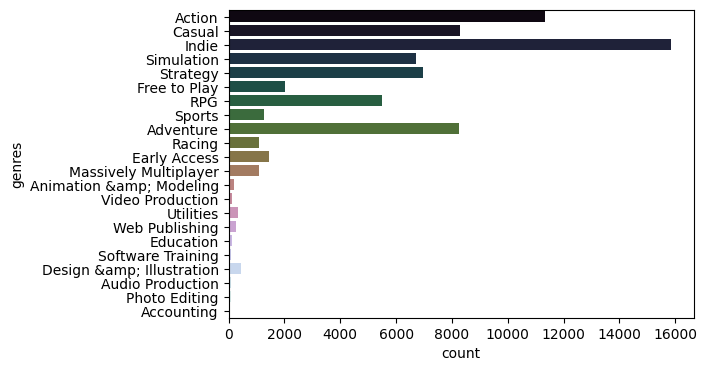

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h', palette=("cubehelix"))
plt.show()

**Conclusión**

- Los generos que mayor cantidad de veces se repiten son `Indie`,`Action`, `Casual` y `Adventure`
- Se muestra en la columna `tags`, que un mismo genero puede tener varios a la vez.

#### Feature `item_id`

In [21]:
# se contabiliza la cantidad de juegos Steam que hay en la plataforma 
cantidad_juegos= len(df_games["item_id"].unique())
cantidad_juegos

28850

**Conclusión**
- La plataforma de juegos Steam contiene 28850 `item_id`, es decir cantidad de titulos o juegos

#### Feature `release_anio`

In [58]:
#se contabilizan los diferentes juegos Steam estrenados por año
cantidad_juegos_anios= df_games["release_anio"].value_counts()

cantidad_juegos_anios

release_anio
2017        25199
2016        17693
2015        12272
2014         6367
2013         3017
2012         2107
2011          987
2010          663
2018          499
2009          492
sin dato      338
2008          332
2007          259
2006          217
2005          139
2003          118
2001          109
2004           92
1999           80
1998           75
1997           64
2002           62
1996           56
2000           55
1994           52
1995           49
1993           40
1992           24
1991           22
1990           14
2019           13
1989           11
1988            9
1984            5
1987            5
1986            5
2021            3
5275            3
1983            3
1985            1
Name: count, dtype: int64

In [59]:
#se elimina fila con un dato mal cargado, que genera distorsión en el análisis
año= "5275"
cantidad_juegos_anios=cantidad_juegos_anios.drop(año)

In [60]:
cantidad_juegos_anios

release_anio
2017        25199
2016        17693
2015        12272
2014         6367
2013         3017
2012         2107
2011          987
2010          663
2018          499
2009          492
sin dato      338
2008          332
2007          259
2006          217
2005          139
2003          118
2001          109
2004           92
1999           80
1998           75
1997           64
2002           62
1996           56
2000           55
1994           52
1995           49
1993           40
1992           24
1991           22
1990           14
2019           13
1989           11
1988            9
1984            5
1987            5
1986            5
2021            3
1983            3
1985            1
Name: count, dtype: int64

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


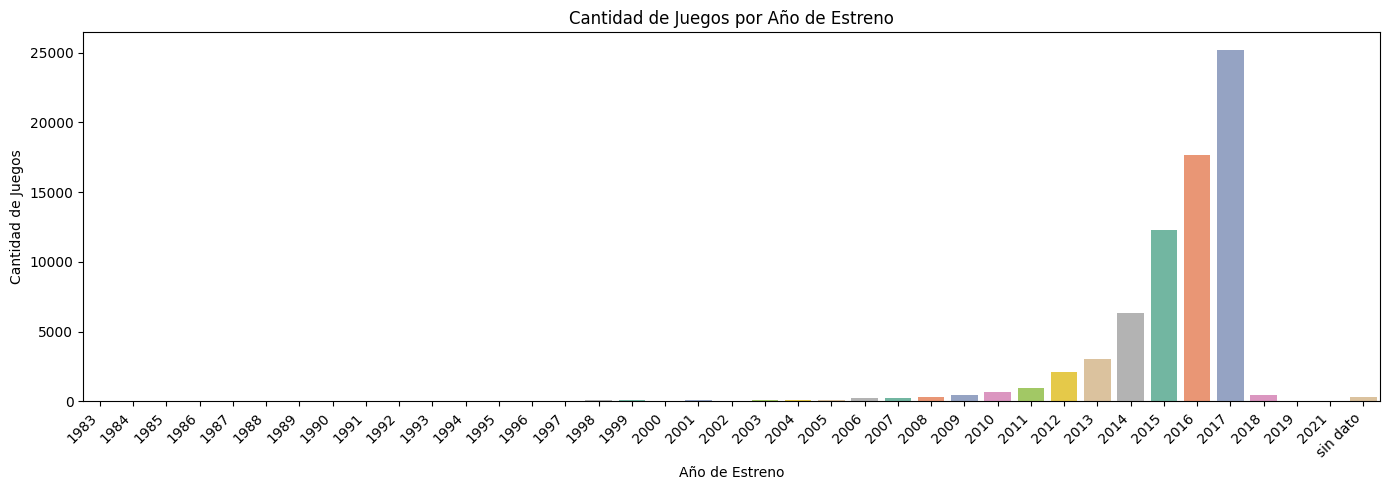

In [61]:
#ordeno el dataframe para poder graficar

cantidad_juegos_anios = cantidad_juegos_anios.reindex(["sin dato"] + list(cantidad_juegos_anios.index))

cantidad_juegos_anios= cantidad_juegos_anios.sort_index()

plt.figure(figsize=(14, 5))

sns.barplot(x=cantidad_juegos_anios.index, y=cantidad_juegos_anios.values, palette=("Set2"))
plt.xlabel('Año de Estreno') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Cantidad de Juegos por Año de Estreno')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusión**
 - Se concentran los estrenos de juegos en la plataforma Steam, entre loa años 2003 incrementandose en gran cantidad hasta el año 2017; luego decaen los registros.
 
 - El año de mayor cantidad de juegos estrenados fue 2017

#### Feature `publisher` y `developer`

In [69]:
# obtengo la cantidad de uegos publicados por editores y desarrolladores 
developer= df_games["developer"].value_counts()

publisher= df_games["publisher"].value_counts()

In [70]:
developer

developer
Ubisoft - San Francisco                                                             2516
SmiteWorks USA, LLC                                                                 2364
DL Softworks                                                                         495
Ronimo Games                                                                         379
Sin Datos                                                                            350
                                                                                    ... 
Viron Shake                                                                            1
Fewjix                                                                                 1
Kyuppin                                                                                1
NHLislive                                                                              1
Evan Hatampour,K.Song Tan,Anton Kagounkin Magdalina,Stuart Hwang,Mike VanPeursem       1
Name: count

In [71]:
publisher

publisher
Sin Datos                  12439
KISS ltd                     807
Ubisoft                      684
Degica                       528
Paradox Interactive          441
                           ...  
Nurgo Software                 1
Ubisoft - San Francisco        1
Marcos Dumont                  1
Ready Play Games               1
PyrofrogStudos                 1
Name: count, Length: 8224, dtype: int64

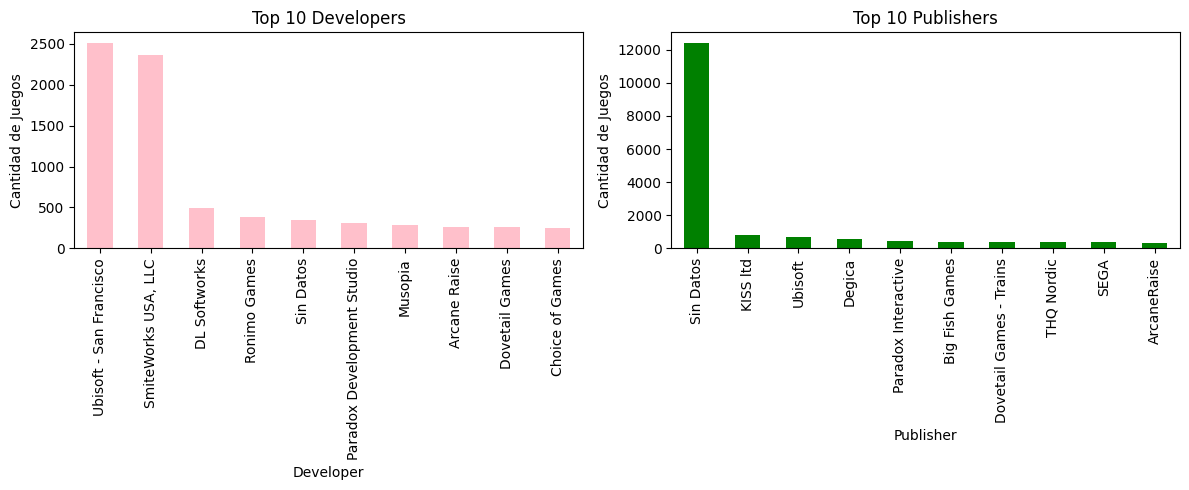

In [72]:
# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
developer[:10].plot(kind='bar', color='pink')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
publisher[:10].plot(kind='bar', color='green')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

**Conclusión**
- Los mayores desarrolladores de juegos Steam son Ubisoft y SmiteWorks
- La mayor cantidad de juegos no poseen el dato del Editor

#### c) Tratamiento Variables numéricas

* **price**: precio del juego en la plataforma

#### Feature `price`

Tratamiento de Outliers

In [78]:
df_games["price"]

0        4.99
1        4.99
2        4.99
3        4.99
4        4.99
         ... 
71546    1.99
71547    1.99
71548    1.99
71549    4.99
71550    4.99
Name: price, Length: 71551, dtype: float64

In [82]:
df_games["price"].value_counts()

price
4.99      9475
9.99      8692
0.00      7951
2.99      7583
0.99      6190
          ... 
14.95        1
771.71       1
124.99       1
99.00        1
42.99        1
Name: count, Length: 136, dtype: int64

In [83]:
#buscamos outliers en precio... aunque se puede comprender que los valores resultarán muy diferentes, debido a ofertas o juegos gratis.

# Se calcula el IQR (Rango Intercuartil)
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

1.99
9.99
8.0


In [84]:
#Se defiene el umbral de outliers
umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR
print(umbral_superior)
print(umbral_inferior)

21.990000000000002
-10.01


In [85]:
#Se identifican los outliers
outliers_superiores = df_games[df_games['price'] > umbral_superior]
outliers_inferiores = df_games[df_games['price'] < umbral_inferior]
print(outliers_superiores)
print(outliers_inferiores)

                 genres                                                url  \
28         Free to Play  http://store.steampowered.com/app/774278/SNOW_...   
29                Indie  http://store.steampowered.com/app/774278/SNOW_...   
30           Simulation  http://store.steampowered.com/app/774278/SNOW_...   
31               Sports  http://store.steampowered.com/app/774278/SNOW_...   
64         Free to Play  http://store.steampowered.com/app/774279/SNOW_...   
...                 ...                                                ...   
71404        Simulation  http://store.steampowered.com/app/719590/Mesoz...   
71405          Strategy  http://store.steampowered.com/app/719590/Mesoz...   
71406      Early Access  http://store.steampowered.com/app/719590/Mesoz...   
71484         Utilities  http://store.steampowered.com/app/755310/Cyber...   
71485  Video Production  http://store.steampowered.com/app/755310/Cyber...   

      release_date                                             

In [86]:
outliers_inferiores

,genres,url,release_date,tags,reviews_url,specs,price,early_access,item_id,release_anio,publisher,app_name,title,developer


In [87]:
outliers_superiores

,genres,url,release_date,tags,reviews_url,specs,price,early_access,item_id,release_anio,publisher,app_name,title,developer
28,Free to Play,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",http://steamcommunity.com/app/774278/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",29.99,False,774278,2018,Poppermost Productions,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,Poppermost Productions
29,Indie,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",http://steamcommunity.com/app/774278/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",29.99,False,774278,2018,Poppermost Productions,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,Poppermost Productions
30,Simulation,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",http://steamcommunity.com/app/774278/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",29.99,False,774278,2018,Poppermost Productions,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,Poppermost Productions
31,Sports,http://store.steampowered.com/app/774278/SNOW_...,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",http://steamcommunity.com/app/774278/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",29.99,False,774278,2018,Poppermost Productions,SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,Poppermost Productions
64,Free to Play,http://store.steampowered.com/app/774279/SNOW_...,2018-01-03,"['Free to Play', 'Indie', 'Simulation', 'Sports']",http://steamcommunity.com/app/774279/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",59.99,False,774279,2018,Poppermost Productions,SNOW - Lifetime Pack,SNOW - Lifetime Pack,Poppermost Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71404,Simulation,http://store.steampowered.com/app/719590/Mesoz...,2018-01-02,"['Early Access', 'Simulation', 'Strategy', 'Ca...",http://steamcommunity.com/app/719590/reviews/?...,['Single-player'],29.99,True,719590,2018,DreamInCode B.V.,Mesozoica,Mesozoica,"DreamInCode B.V.,Squadron Interactive"
71405,Strategy,http://store.steampowered.com/app/719590/Mesoz...,2018-01-02,"['Early Access', 'Simulation', 'Strategy', 'Ca...",http://steamcommunity.com/app/719590/reviews/?...,['Single-player'],29.99,True,719590,2018,DreamInCode B.V.,Mesozoica,Mesozoica,"DreamInCode B.V.,Squadron Interactive"
71406,Early Access,http://store.steampowered.com/app/719590/Mesoz...,2018-01-02,"['Early Access', 'Simulation', 'Strategy', 'Ca...",http://steamcommunity.com/app/719590/reviews/?...,['Single-player'],29.99,True,719590,2018,DreamInCode B.V.,Mesozoica,Mesozoica,"DreamInCode B.V.,Squadron Interactive"
71484,Utilities,http://store.steampowered.com/app/755310/Cyber...,2017-12-26,"['Utilities', 'Video Production']",http://steamcommunity.com/app/755310/reviews/?...,None,29.99,False,755310,2017,Koch Media,CyberLink YouCam 7 Deluxe,CyberLink YouCam 7 Deluxe,CyberLink


Ahora se crean dos gráficos: 
- un `Stripplot` para visualizar la distribución de los precios de los juegos 
- un `Boxplot` para resumir estadísticamente esos precios

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

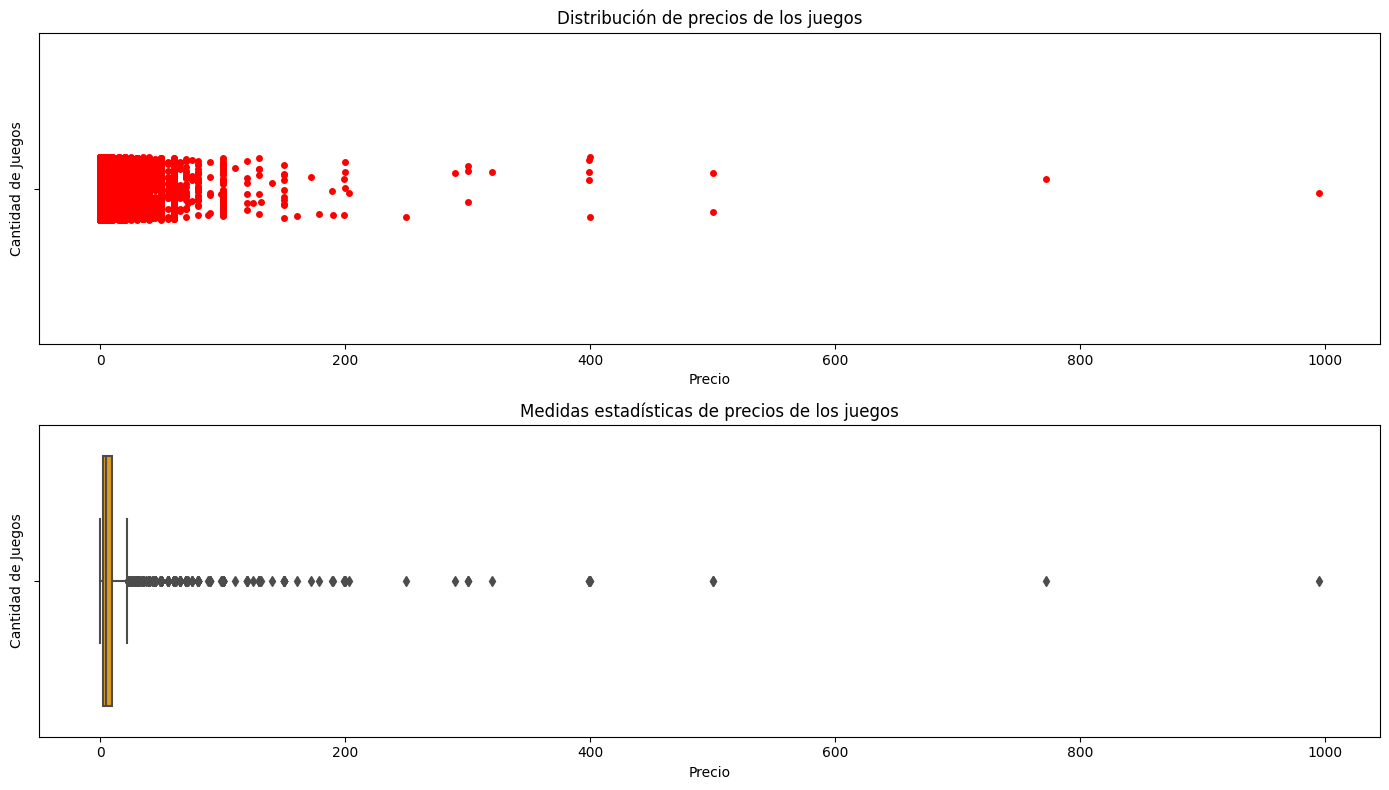

In [97]:
# Obtiene los precios para cada juego y hace un dataframe
precio = df_games.groupby('item_id')['price'].unique().reset_index().explode('price')
precio_out = precio['price']

fig = plt.figure(figsize=(14, 8))

#Stripplot (distribución de precios)
ax1 = fig.add_subplot(211)
sns.stripplot(data=precio_out, x=precio_out, ax=ax1, color="red")
ax1.set_xlabel('Precio') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

#Boxplot (medidas estadísticas)
ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=precio_out, x=precio_out, ax=ax2, color="orange")
ax2.set_xlabel('Precio') ; ax2.set_ylabel('Cantidad de Juegos'), ax2.set_title('Medidas estadísticas de precios de los juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [89]:
df_games.describe()

,price,item_id
count,71551.000000,7.155100e+04
mean,8.444274,4.625947e+05
std,15.767991,1.741703e+05
min,0.000000,1.000000e+01
25%,1.990000,3.414650e+05
50%,4.990000,4.568300e+05
75%,9.990000,5.984750e+05
max,995.000000,2.028850e+06


Analizo sólo la columna precios 

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


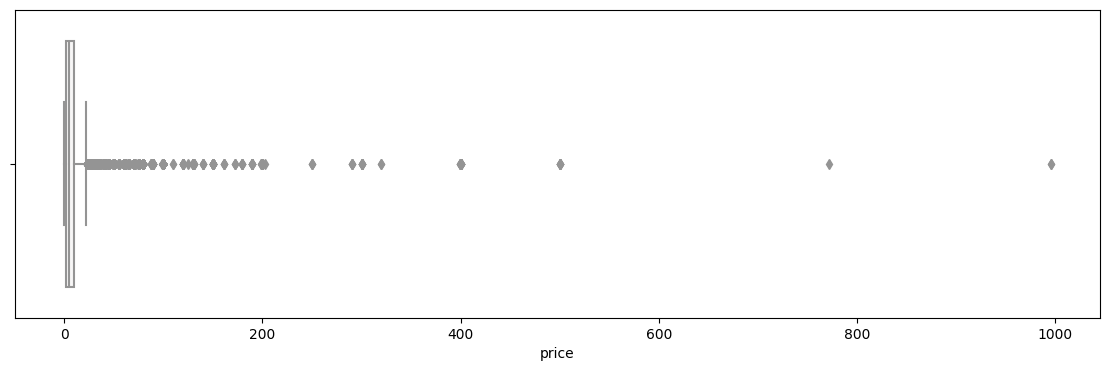

In [96]:
fig = plt.figure(figsize=(14, 4))

sns.boxplot(data=df_games, x='price',palette='RdBu_r')
plt.show()

**Conclusión**
- Los precios de los juegos en promedio es de 8.44
- El 50% de los precios de los juegos Steam en encuentra entre 0 y 4.99
- El 75% de los precios de los juegos Steam se encuentra por debajo de los 9.99
- El precio máximo es de 995.00 
- La cantidad de Outliers de precio en el margen superior es de 4076 

### 2- EDA de `user_reviews.parquet`

#### a) Extracción y revisión de nulos y duplicados

Se extrae el dataset que resulto luego del ETL

In [102]:
df_reviews=pd.read_parquet("data/user_reviews.parquet")
df_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analisis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-11-05,None,1250,No ratings yet,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-07-15,None,22200,No ratings yet,True,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,None,2011-04-21,None,43110,No ratings yet,True,1
3,js41637,http://steamcommunity.com/id/js41637,None,2014-06-24,None,251610,15 of 20 people (75%) found this review helpful,True,2
4,js41637,http://steamcommunity.com/id/js41637,None,2013-09-08,None,227300,0 of 1 people (0%) found this review helpful,True,1
...,...,...,...,...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,None,None,None,70,No ratings yet,True,2
59157,3214213216,http://steamcommunity.com/id/3214213216,None,None,None,362890,No ratings yet,True,2
59158,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,1 person found this review funny,None,None,273110,1 of 2 people (50%) found this review helpful,True,1
59159,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,None,None,None,730,No ratings yet,True,2


Se buscan nulos y duplicados

In [103]:
#se informa la cantidad de columnas y el tipo de dato que contiene 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   user_url            59161 non-null  object
 2   funny               8127 non-null   object
 3   posted              49070 non-null  object
 4   last_edited         6123 non-null   object
 5   item_id             59161 non-null  int64 
 6   helpful             59161 non-null  object
 7   recommend           59161 non-null  bool  
 8   sentiment_analisis  59161 non-null  int64 
dtypes: bool(1), int64(2), object(6)
memory usage: 3.7+ MB


In [104]:
df_reviews.isnull().sum()

user_id                   0
user_url                  0
funny                 51034
posted                10091
last_edited           53038
item_id                   0
helpful                   0
recommend                 0
sentiment_analisis        0
dtype: int64

Las columnas `funny ` y `last_edited` poseen casi todos sus datos nulos por lo que pueden eliminarse del data frame , debido a que no son relevantes para el modelo

In [106]:
df_reviews.drop(columns=["funny", "last_edited"], axis=1, inplace=True)
df_reviews.head(2)

,user_id,user_url,posted,item_id,helpful,recommend,sentiment_analisis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,No ratings yet,True,2


#### b) Tratamiento Variables categóricas

* **user_id** : identificación del usuario de plataforma
* **recommend** : valor booleano que indica si se ha realizado review
* **sentiment_analisis** : clasificación de las reviews en:
    -* positivo = 2 
    -* negativo = 0 
    -* neutral = 1

#### Feature `user_id`

In [108]:
# se contabiliza la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_user_reviews= len(df_reviews["user_id"].unique())
cantidad_user_reviews

25467

**Conclusión**
- En la plataforma de juegos hay 25467 usuarios `user_id` diferentes registrados 

#### Feature `recommend`

Se cuentan la cantidad de recomendaciones hechas

In [113]:
cant_recomendacion= df_reviews["recommend"].value_counts()
cant_recomendacion

recommend
True     52350
False     6811
Name: count, dtype: int64

**Conclusión**
- Los usuarios realizaron 52350 recomendaciones
- Se puede deducir que cada `user_id` realizó más de una recomendación de juego

#### Feature `sentiment_analisis`

In [114]:
#realizo el conteo de cada una de las categorias de sentimientos
cant_sent= df_reviews["sentiment_analisis"].value_counts()
cant_sent

sentiment_analisis
2    26200
1    24898
0     8063
Name: count, dtype: int64

**Conclusión**
- Las reviews con sentimientos positivos fueron 26200
- Las reviews con sentimientos neutrales fueron 24898
- Las reviews con sentimientos negativos fueron 8063

#### c) Tratamiento Variables numéricas

* **posted** : fecha en que se realiza la review

#### Feature `posted`

In [115]:
fecha=df_reviews["posted"].describe()
fecha

count          49070
unique          1644
top       2014-06-21
freq             224
Name: posted, dtype: object

In [126]:
#Transformo fecha de posteo a tipo de dato datetime para poder analizarlo mejor 
df_reviews["posted"]= pd.to_datetime(df_reviews["posted"])

Se grafica un histograma de fechas de posteo

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


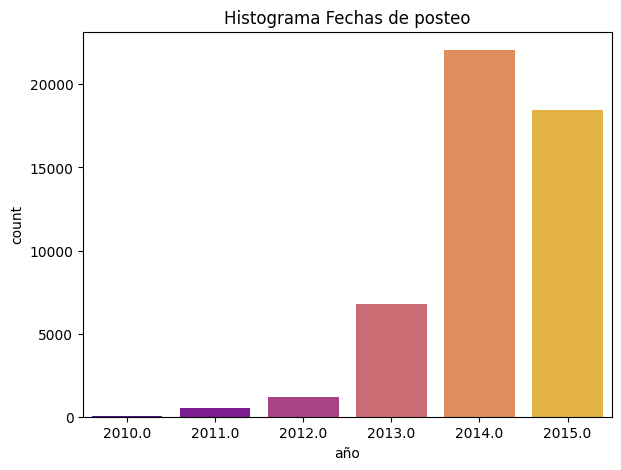

In [142]:
df_reviews['año'] = df_reviews['posted'].dt.year
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histograma Fechas de posteo')
sns.countplot(data = df_reviews, x = 'año', palette=("plasma"))

plt.show()

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


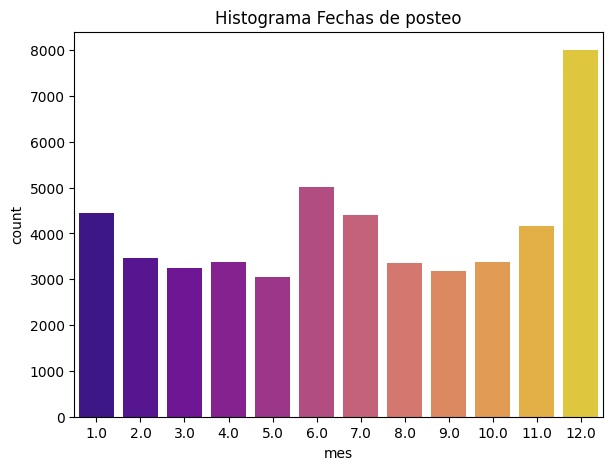

In [143]:
df_reviews['mes'] = df_reviews['posted'].dt.month
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histograma Fechas de posteo')
sns.countplot(data = df_reviews, x = 'mes', palette=("plasma"))

plt.show()

Se grafica un boxplot por año o mes

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


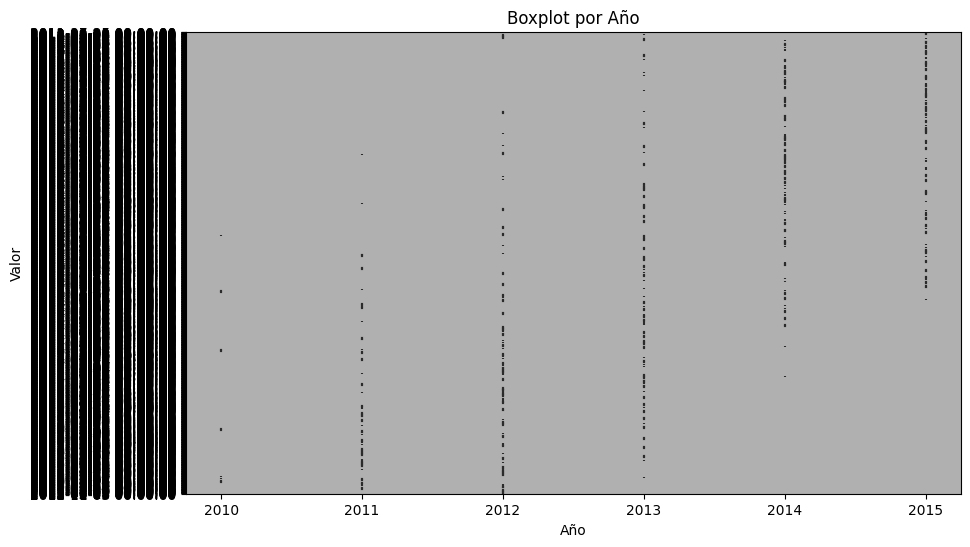

e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


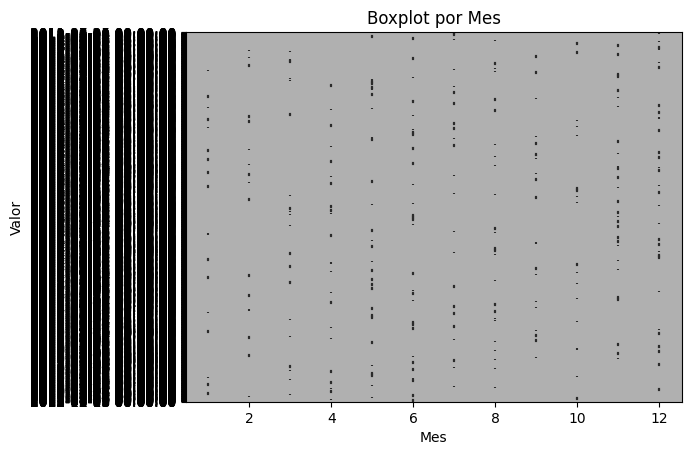

In [141]:
df_reviews['año'] = df_reviews['posted'].dt.year
df_reviews['mes'] = df_reviews['posted'].dt.month

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_reviews, x='año', y='posted', palette=("plasma"))  
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Boxplot por Año')
plt.grid(True)

plt.show()

sns.boxplot(data=df_reviews, x='mes', y='posted', palette=("plasma"))  
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title('Boxplot por Mes')
plt.grid(True)

plt.show()

**Conclusión**
- La cantidad total de fechas de posteos es de 49070. Con 1644 fechas únicas
- El valor con más frecuencia es "2014-6-21" que aparece un total de 224 veces, siendo la fecha de mayores posteos
- El año con más posteos fue 2014, seguido por 2015
- El mes con mayores posteos es Diciembre, seguido por Junio, Julio y Enero 

### 3- EDA de `user_items.parquet`

#### a) Extracción y revisión de nulos y duplicados

Se extrae el dataset que resulto luego del ETL

In [144]:
df_items=pd.read_parquet("data/user_items.parquet")
df_items

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...
5094100,346330,BrainBread 2,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094101,373330,All Is Dust,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094102,388490,One Way To Die: Steam Edition,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5094103,521570,You Have 10 Seconds 2,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [145]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   steam_id          int64 
 4   items_count       int64 
 5   user_id           object
 6   user_url          object
dtypes: int64(4), object(3)
memory usage: 272.1+ MB


In [146]:
df_items.describe()

,item_id,playtime_forever,steam_id,items_count
count,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02,7.656120e+16,3.157324e+02
std,1.318516e+05,5.414297e+03,3.917652e+07,6.969073e+02
min,1.000000e+01,0.000000e+00,7.656120e+16,1.000000e+00
25%,3.445000e+04,0.000000e+00,7.656120e+16,7.100000e+01
50%,2.144200e+05,3.400000e+01,7.656120e+16,1.370000e+02
75%,2.664300e+05,3.550000e+02,7.656120e+16,2.750000e+02
max,5.307200e+05,6.427730e+05,7.656120e+16,7.762000e+03


In [147]:
df_items.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
steam_id            0
items_count         0
user_id             0
user_url            0
dtype: int64

#### b) Tratamiento Variables categóricas

* **item_name** : titulo del juego Steam

#### Feature `item_name`

In [152]:
#conteo de titulos totales
cant_juegos= len(df_items["item_name"].unique())
cant_juegos

10947

In [148]:
#conteo por titulo 
juego = df_items["item_name"].value_counts()
juego

item_name
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43336
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

**Conclusión**
- La cantidad de títulos de juegos Steam en la plataforma es de 10947
- Los juegos que se repiten con mayor frecuencia en el conteo son Dota 2 Test (49136), le sigue Counter-Strike:Global Offensive (43336) y Garry`s Mod (42849)

#### c) Tratamiento Variables numéricas

* **items_count** : cantidad de juegos Steam que consume un usuario
* **playtime_forever** : cantidad de tiempo que juega un usuario

#### Feature `items_count`

In [155]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count = df_items.groupby('user_id')['items_count'].unique().explode()
items_count= pd.DataFrame(items_count)
items_count_user = items_count.sort_values('items_count', ascending=False)
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198092978311,1
76561198092984441,1
76561198092985047,1


e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

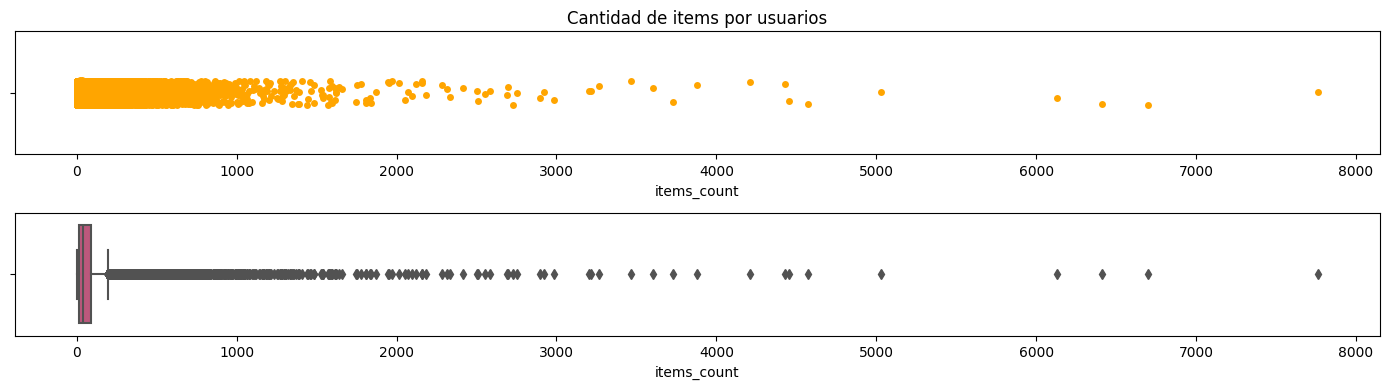

In [156]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user, x='items_count', ax=ax1, color="orange")
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user, x='items_count', ax=ax2, palette="plasma")
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [157]:
items_count_user.describe()

,items_count
count,70912
unique,924
top,1
freq,3303


**Conclusión**
- La cantidad total de Items o juegos consumidos es de 70912. 
- El valor que se repite con mayor frecuencia (3303 veces) es de 1
- El `user_id` con más cantidad de juegos consumidos es `phrostb` con 7762, seguido de `thugnificent` con 6700


#### Feature `playtime_forever`

In [164]:
#Agrupo usuarios por tiempo, lo guardo en un nuevo dataframe y ordeno 
time_count = df_items.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)
time_count_user

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
...,...
76561198031798372,0
Cjixeres,0
76561198085797241,0


e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\JIME\Desktop\PI_1-MLOps_Juegos_Steam\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

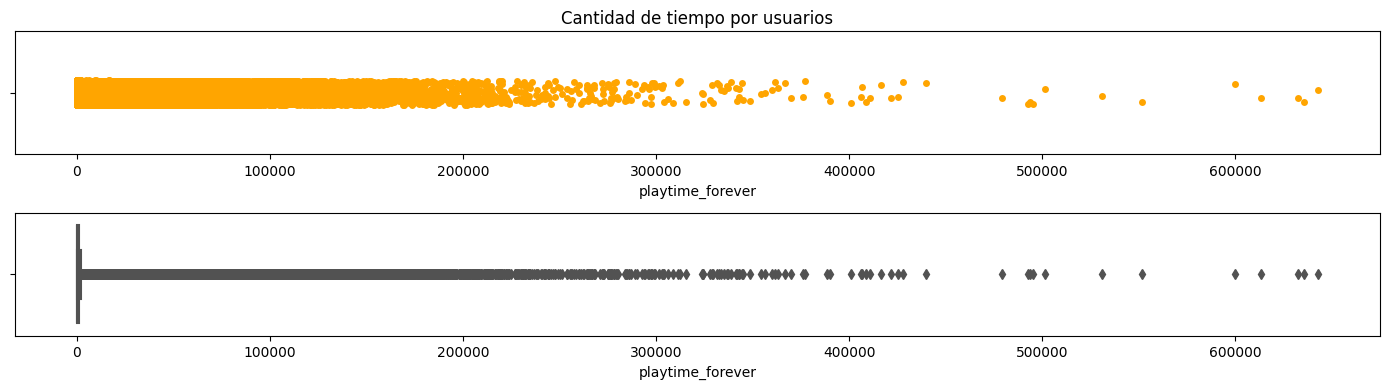

In [166]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=time_count_user, x='playtime_forever', ax=ax1, color="orange")
ax1.set_xlabel('playtime_forever') ; ax1.set_title('Cantidad de tiempo por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=time_count_user, x='playtime_forever', ax=ax2, palette="plasma")
ax2.set_xlabel('playtime_forever')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [167]:
time_count_user.describe()

,playtime_forever
count,2890282
unique,48861
top,0
freq,66878


**Conclusión**
- La cantidad total de tiempo jugado o consumidos es de 2890282, suponiendo sean minutos; la cantidad de horas es 48:17hs. 
- El valor que se repite con mayor frecuencia (48861 veces) es de 0; entonces la mayoría de los usuarios no alcanzan a jugar 1 hora
- El `user_id` con más cantidad de tiempo consumido en juegos Steam es `wolop` con 642773 , seguido de `Evilutional` con 635295 y muy cercano `76561198019826668` con 632452.

## Preparación de dataset para el modelo de recomendación

In [4]:
modelo_item= pd.read_parquet("data/steam_games.parquet")
modelo_item

,genres,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,Año_estreno,publisher,app_name,title,developer
0,Action,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,False,761140,NaN,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71546,Indie,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71547,Racing,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71548,Simulation,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,NaN,2018,Laush Studio,Russian Roads,Russian Roads,Laush Dmitriy Sergeevich
71549,Casual,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870,NaN,2017,SIXNAILS,EXIT 2 - Directions,EXIT 2 - Directions,"xropi,stev3ns"


Creo un dataframe con las columnas que voy a utilizar `id`,`app_name` y `genre`

In [8]:
modelo_item= modelo_item[["id", "app_name", "genres"]]
modelo_item

,id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
71546,610660,Russian Roads,Indie
71547,610660,Russian Roads,Racing
71548,610660,Russian Roads,Simulation
71549,658870,EXIT 2 - Directions,Casual


In [9]:
#Se buscan nulos
modelo_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        71551 non-null  int64 
 1   app_name  71551 non-null  object
 2   genres    71551 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


### Creando el archivo para el modelado

In [10]:
modelo_item.to_parquet("data/modelo_item.parquet")